In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [5]:
gender_df=pd.get_dummies(df['Gender'],drop_first=True)
gender_df

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [6]:
df.drop('User ID',axis=1,inplace=True)

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
df.drop('Gender',axis=1,inplace=True)

In [9]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [10]:
df=pd.concat([df,gender_df],axis=1)

In [11]:
df

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [12]:
X = df.iloc[:, [0, 1,3]].values
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]], dtype=int64)

In [13]:
y = df.iloc[:, -2].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
X_train

array([[    58, 144000,      1],
       [    59,  83000,      0],
       [    24,  55000,      0],
       [    26,  35000,      0],
       [    58,  38000,      0],
       [    42,  80000,      0],
       [    40,  75000,      0],
       [    59, 130000,      1],
       [    46,  41000,      0],
       [    41,  60000,      0],
       [    42,  64000,      1],
       [    37, 146000,      0],
       [    23,  48000,      0],
       [    25,  33000,      1],
       [    24,  84000,      1],
       [    27,  96000,      0],
       [    23,  63000,      1],
       [    48,  33000,      1],
       [    48,  90000,      1],
       [    42, 104000,      1],
       [    44,  39000,      0],
       [    32, 120000,      1],
       [    38,  50000,      0],
       [    32, 135000,      0],
       [    52,  21000,      0],
       [    53, 104000,      0],
       [    39,  42000,      1],
       [    38,  61000,      1],
       [    36,  50000,      0],
       [    36,  63000,      0],
       [  

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00,  1.02532046e+00],
       [ 2.02016082e+00,  3.78719297e-01, -9.75304830e-01],
       [-1.38221530e+00, -4.32498705e-01, -9.75304830e-01],
       [-1.18779381e+00, -1.01194013e+00, -9.75304830e-01],
       [ 1.92295008e+00, -9.25023920e-01, -9.75304830e-01],
       [ 3.67578135e-01,  2.91803083e-01, -9.75304830e-01],
       [ 1.73156642e-01,  1.46942725e-01, -9.75304830e-01],
       [ 2.02016082e+00,  1.74040666e+00,  1.02532046e+00],
       [ 7.56421121e-01, -8.38107706e-01, -9.75304830e-01],
       [ 2.70367388e-01, -2.87638347e-01, -9.75304830e-01],
       [ 3.67578135e-01, -1.71750061e-01,  1.02532046e+00],
       [-1.18475597e-01,  2.20395980e+00, -9.75304830e-01],
       [-1.47942605e+00, -6.35303205e-01, -9.75304830e-01],
       [-1.28500455e+00, -1.06988428e+00,  1.02532046e+00],
       [-1.38221530e+00,  4.07691369e-01,  1.02532046e+00],
       [-1.09058306e+00,  7.55356227e-01, -9.75304830e-01],
       [-1.47942605e+00, -2.00722133e-01

In [18]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.925

In [29]:
import pickle
pickle.dump(sc,open("scaler.pickle", 'wb'))
ssc = pickle.load(open("scaler.pickle", 'rb'))

pickle.dump(classifier, open('nbclassifier.pkl', 'wb' ))
model = pickle.load(open('nbclassifier.pkl', 'rb'))

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [21]:
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[56,  2],
       [ 4, 18]], dtype=int64)

Text(42.0, 0.5, 'Truth')

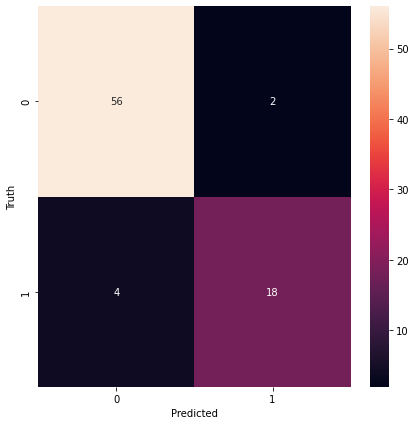

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')